# Stable Set Problem

Given a graph $G=(V,E)$, find the maximum set of non-adjacent vertices.

## Variables:

$$
x_i = \begin{cases}
1 \text{ if vertex $i$ is selected } \\
0 \text { otherwise}
\end{cases}
$$

## Formulation:
\begin{eqnarray}
max && \sum_{i \in V} x_i \\
s.t.\\
x_i + x_j \leq 1 , &&&& \forall (i,j) \in E \\
x_i \in {\{0,1\}} , &&&& \forall i \in V \\
\end{eqnarray}

In [1]:
import gurobipy as gb
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
G = nx.Graph()

In [3]:
G.add_nodes_from([1,2,3,4,5,6])

In [4]:
G.add_edges_from([(1,2),(1,3),(2,3),(2,4),(2,5),(2,6),(3,6),(4,6),(5,6)])

G:


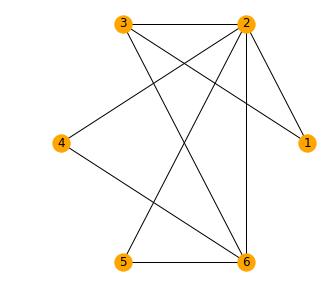

In [17]:
plt.figure(figsize=(5,5))
plt.axis('off')


pos = nx.shell_layout(G)

nx.draw_networkx_nodes(G,pos,G.nodes(),node_color='orange')
nx.draw_networkx_edges(G,pos,G.edges())

node_labels = {i:i for i in G.nodes()}

nx.draw_networkx_labels(G,pos,labels=node_labels)

print("G:")

In [6]:
stableset = gb.Model()

Academic license - for non-commercial use only


In [7]:
x = stableset.addVars(G.nodes(),vtype=gb.GRB.BINARY,name='x')

In [8]:
stableset.setObjective(x.sum('*'), gb.GRB.MAXIMIZE)

In [9]:
for u,v in G.edges():
    name = "stable_%s_%s" % (u,v)
    stableset.addConstr(x[u] + x[v] <= 1, name=name)

In [10]:
stableset.update()

In [11]:
stableset.write('stableset.lp')

In [12]:
stableset.optimize()

Optimize a model with 9 rows, 6 columns and 18 nonzeros
Variable types: 0 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3.0000000
Presolve removed 9 rows and 6 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds
Thread count was 1 (of 4 available processors)

Solution count 1: 3 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%


In [13]:
print("Obj:", stableset.ObjVal,"\n")

for i in stableset.getVars():
    print("%s = %g" % (i.VarName, i.x))

Obj: 3.0 

x[1] = 1
x[2] = 0
x[3] = 0
x[4] = 1
x[5] = 1
x[6] = 0


sol G:


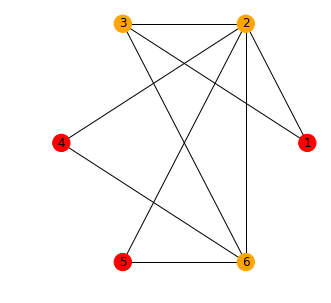

In [20]:
# print solution graph
plt.figure(figsize=(5,5))
plt.axis('off')

pos = nx.shell_layout(G)

colors = ['red' if i.x == 1.0 else 'orange' for i in stableset.getVars()]
node_labels = {i:i for i in G.nodes()}

nx.draw_networkx_nodes(G,pos,G.nodes(),node_color=colors)
nx.draw_networkx_edges(G,pos,G.edges())

nx.draw_networkx_labels(G,pos,labels=node_labels)

print("sol G:")